In [1]:
import numpy as np
import matplotlib.pyplot as plt

Plotting data with + indicating (y = 1) examples and o indicating (y = 0) examples


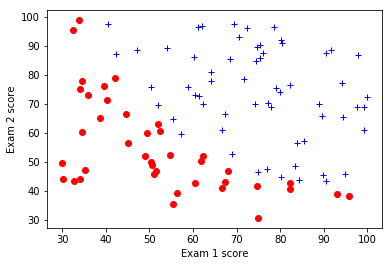

In [2]:
# File 'ex2data1.txt' contains data in 3 columns
# Columns 1 and 2 are exam scores
# Column 3 is the label

f = open('ex2data1.txt', 'r')
x1_list = []
x2_list = []
y_list = []

for line in f:
    x1_str, x2_str, y_str = line.split(',')
    x1_list.append(float(x1_str))
    x2_list.append(float(x2_str))
    y_list.append(int(y_str))

# Let's now plot the data
    
print('Plotting data with + indicating (y = 1) examples and o indicating (y = 0) examples')

for i in range(0,len(y_list)):
    if y_list[i] == 1:
        plt.plot(x1_list[i],x2_list[i],'b+',linewidth=0)
    else:
        plt.plot(x1_list[i],x2_list[i],'ro',linewidth=0)
plt.xlabel('Exam 1 score')
plt.ylabel('Exam 2 score')
plt.show()

In [3]:
# Normalize the data
x1 = np.matrix(x1_list).reshape(len(x1_list),1)
x2 = np.matrix(x2_list).reshape(len(x2_list),1)

max_x1 = np.amax(x1, axis=0)
max_x2 = np.amax(x2, axis=0)
min_x1 = np.amin(x1, axis=0)
min_x2 = np.amin(x2, axis=0)
mean_x1 = np.average(x1, axis=0)
mean_x2 = np.average(x2, axis=0)

for i in range(0,len(y_list)):
    x1[i,0] = (x1[i,0] - mean_x1) / (max_x1 - min_x1)
    x2[i,0] = (x2[i,0] - mean_x2) / (max_x2 - min_x2)


In [4]:
y = np.matrix(y_list).reshape(len(y_list),1)
X = np.c_[x1,x2]

m = len(y_list)
nn_input_dim = 2
nn_output_dim = 2
nn_hidden_dim = 5


In [5]:
# Initialize weights
W1 = np.random.random((nn_input_dim, nn_hidden_dim)) * 2.0 - 1.0
b1 = np.zeros((1, nn_hidden_dim))
W2 = np.random.random((nn_hidden_dim, nn_output_dim)) * 2.0 - 1.0
b2 = np.zeros((1, nn_output_dim))

In [6]:
print('W1: ',W1)
print('b1: ',b1)
print('W2: ',W2)
print('b2: ',b2)

W1:  [[ 0.65151171 -0.38198799 -0.93355731  0.51767817 -0.6703484 ]
 [ 0.82935139 -0.15985876 -0.05400091  0.24187882 -0.05106153]]
b1:  [[ 0.  0.  0.  0.  0.]]
W2:  [[ 0.3795989  -0.07144333]
 [-0.39295786  0.41482622]
 [ 0.93374748 -0.74741437]
 [-0.80421196  0.28453994]
 [ 0.2902257  -0.8437296 ]]
b2:  [[ 0.  0.]]


In [7]:
# X          m x nn_input_dim
# W1, dW1    nn_input_dim x nn_hidden_dim
# b1, db1    1 x nn_hidden_dim
# s1         m x nn_hidden_dim
# h1         m x nn_hidden_dim
# W2, dW2    nn_hidden_dim x nn_output_dim
# b2, db2    1 x nn_output_dim
# s2         m x nn_output_dim
# esp_score  m x nn_output_dim
# h          m x nn_output_dim
# delta2     m x nn_output_dim
# delta1     m x nn_hidden_dim 

In [8]:
# train the model

num_passes = 10000
alpha = 0.0001

for i in range(0, num_passes):
 
    # Forward propagation
    s1 = X.dot(W1) + b1
    h1 = np.tanh(s1)
    s2 = h1.dot(W2) + b2
    exp_scores = np.exp(s2)
    h = exp_scores / np.sum(exp_scores, axis=1) # softmax
    
    if (i%100 == 0) :
        predict = [1 if k >= 0.5 else 0 for k in h[:,1]]
        print('Accuracy of predictions at iteration ', i, ' : ', np.sum(np.equal(predict,y_list))/len(y_list))
        loss = np.sum(-np.log(h[range(m), y])) * 1.0/m
        print('Cross entropy loss: ', loss)
    
    # Backpropagation
    delta2 = h
    delta2[range(m), y] -= 1
    dW2 = (h1.T).dot(delta2)
    db2 = np.sum(delta2, axis=0)
    delta1 = np.multiply(delta2.dot(W2.T), (1 - np.power(h1, 2)))
    dW1 = np.dot(X.T, delta1)
    db1 = np.sum(delta1, axis=0)
        
    # Gradient descent parameter update
    W1 += -alpha * dW1
    b1 += -alpha * db1
    W2 += -alpha * dW2
    b2 += -alpha * db2
 

Accuracy of predictions at iteration  0  :  0.74
Cross entropy loss:  73.9142069156
Accuracy of predictions at iteration  100  :  0.71
Cross entropy loss:  73.4190759997
Accuracy of predictions at iteration  200  :  0.63
Cross entropy loss:  72.7467228312
Accuracy of predictions at iteration  300  :  0.54
Cross entropy loss:  72.4733115782
Accuracy of predictions at iteration  400  :  0.53
Cross entropy loss:  71.6697877794
Accuracy of predictions at iteration  500  :  0.53
Cross entropy loss:  70.2705033028
Accuracy of predictions at iteration  600  :  0.56
Cross entropy loss:  69.4182748745
Accuracy of predictions at iteration  700  :  0.63
Cross entropy loss:  69.255436843
Accuracy of predictions at iteration  800  :  0.66
Cross entropy loss:  69.2775371365
Accuracy of predictions at iteration  900  :  0.67
Cross entropy loss:  69.3005161051
Accuracy of predictions at iteration  1000  :  0.69
Cross entropy loss:  69.3103864776
Accuracy of predictions at iteration  1100  :  0.69
Cros

Accuracy of predictions at iteration  9700  :  0.72
Cross entropy loss:  69.3147208093
Accuracy of predictions at iteration  9800  :  0.72
Cross entropy loss:  69.3147207226
Accuracy of predictions at iteration  9900  :  0.72
Cross entropy loss:  69.3147206395


In [9]:
# Calculate the error on the training set based on recent weights
s1 = X.dot(W1) + b1
h1 = np.tanh(s1)
s2 = h1.dot(W2) + b2
exp_scores = np.exp(s2)
h = exp_scores / np.sum(exp_scores, axis=1) # softmax

# Calculate error for the given weights
print('W1: ',W1)
print('b1: ',b1)
print('W2: ',W2)
print('b2: ',b2)
predict = [1 if k >= 0.5 else 0 for k in h[:,1]]
print('FINAL Accuracy of predictions: ', np.sum(np.equal(predict,y_list))/len(y_list))
loss = np.sum(-np.log(h[range(m), y])) * 1.0/m
print('FINAL Cross entropy loss: ', loss)

W1:  [[ 0.36952334 -0.25137726 -0.41965606  0.2317469  -0.30691329]
 [ 0.45780755 -0.08282693 -0.04929     0.13995282 -0.03682894]]
b1:  [[ 4.95065424  4.90465128  4.92602178 -4.93842297 -4.94337618]]
W2:  [[ 48.68935535  48.30847146]
 [ 46.92266457  47.88192838]
 [ 48.66428744  47.26253281]
 [-49.42119292 -48.62604502]
 [-48.51042316 -49.7906836 ]]
b2:  [[ 49.83088688  50.16911312]]
FINAL Accuracy of predictions:  0.72
FINAL Cross entropy loss:  69.3147205599


In [10]:
# Make prediction
Example = np.matrix([45, 85]).reshape(1,2)
s1 = Example.dot(W1) + b1
h1 = np.tanh(s1)
s2 = h1.dot(W2) + b2
exp_scores = np.exp(s2)
h = exp_scores / np.sum(exp_scores, axis=1) # softmax
print('For a student with scores 45 and 85, we predict an admission probability of ', h[0,1])

For a student with scores 45 and 85, we predict an admission probability of  0.92238782768
